## Traffic on the I-94 Interstate highway

The project aims to discover what determines the heavy traffic on I-94. There could be some options, for example: weather type, time of the day, time of the week...

In [3]:
import pandas as pd
traffic=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
print(traffic.head(5))
print(traffic.tail(5))
traffic.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

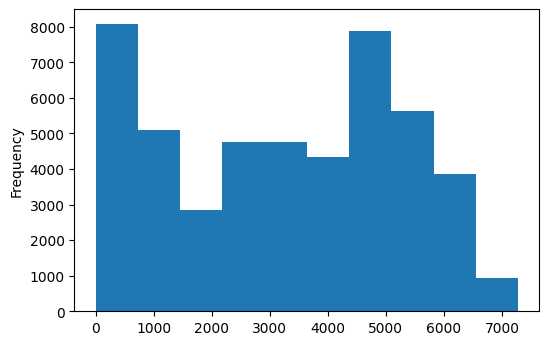

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
traffic["traffic_volume"].plot.hist()
plt.show()
traffic["traffic_volume"].describe()


The minimum traffic volume is 0, on the other hand the maximum is 7280. The averege is 3259. There is probably an influence of daytime and nightime but it's necessary a better analysis to discover it. 

In [24]:
traffic["date_time"]=pd.to_datetime(traffic["date_time"])
day=traffic.copy()[(traffic["date_time"].dt.hour>=7) & (traffic["date_time"].dt.hour<19)]
night=traffic.copy()[(traffic["date_time"].dt.hour>=19) | (traffic["date_time"].dt.hour<7)]

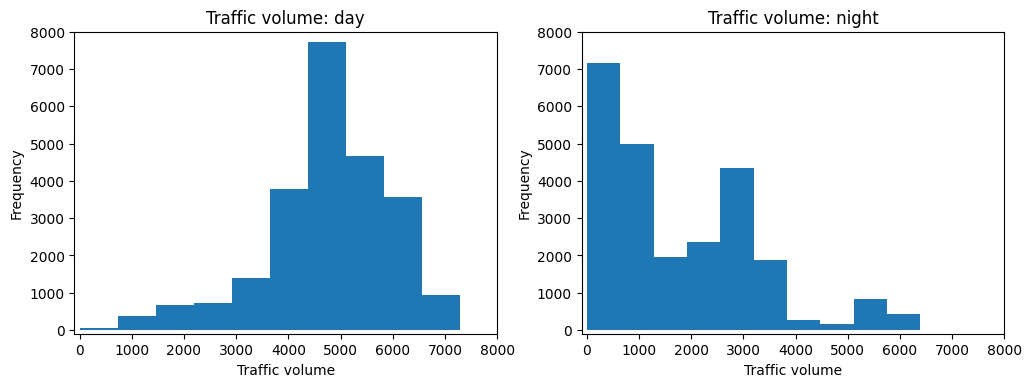

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.title("Traffic volume: day")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
plt.xlim([-100,8000])
plt.ylim([-100,8000])

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.title("Traffic volume: night")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")
plt.xlim([-100,8000])
plt.ylim([-100,8000])

plt.show()

In [26]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [27]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The traffic volume is higher for the daytime compared to the night time. Just looking at the mean value during the day the mean is equal to: 4762.04. On the other hand, during the night: 1785.38. For now, it is better to focus on daytime due to for the high traffic. 

In [28]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

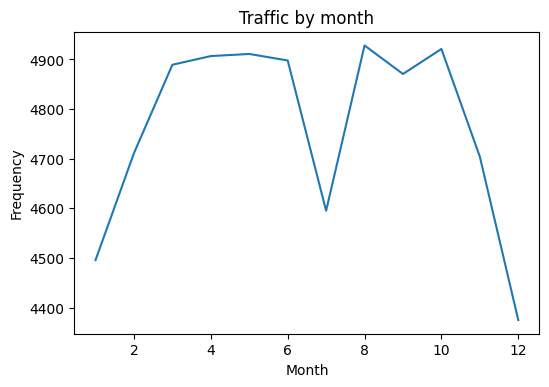

In [34]:
plt.plot( by_month["traffic_volume"])
plt.title("Traffic by month")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

The traffic volume is low January, July and December. 

In [35]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

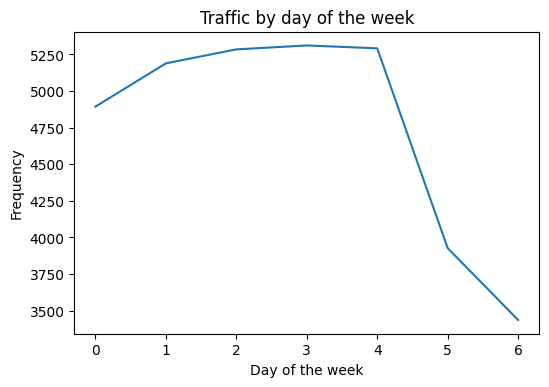

In [36]:
plt.plot(by_dayofweek["traffic_volume"])
plt.title("Traffic by day of the week")
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.show()

During the weekend the traffic is lower compared to the working days. 

In [37]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


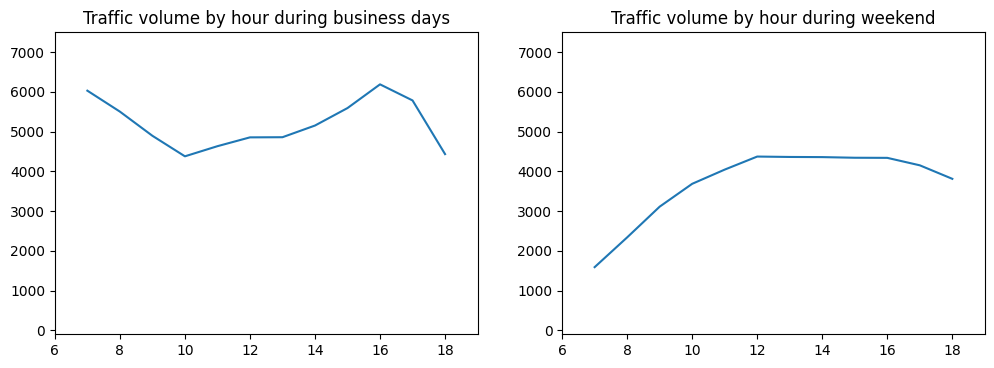

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(by_hour_business["traffic_volume"])
plt.title("Traffic volume by hour during business days")
plt.xlim([6,19])
plt.ylim([-100,7500])
plt.subplot(1,2,2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.title("Traffic volume by hour during weekend")
plt.xlim([6,19])
plt.ylim([-100,7500])
plt.show()

During business days the rush hours are at nearly 7 and between 16 and 17. Probably when people goes to work and when they leave.
Summarizing:
There is more traffic during the period March-May, during the working days and at the beginning and the end of the business days. 

In [46]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

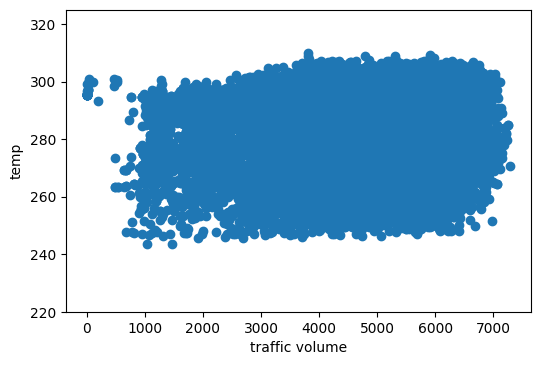

In [52]:
plt.scatter(day["traffic_volume"], day["temp"])
plt.ylim([220,325])
plt.xlabel("traffic volume")
plt.ylabel("temp")
plt.show()

The correlation is low, so it doesn't seem a great indicator.

In [53]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

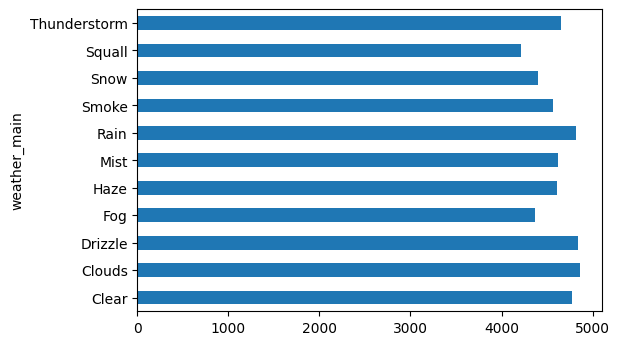

In [57]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

There isn't an indicator that exceeds the 5000 cars. 


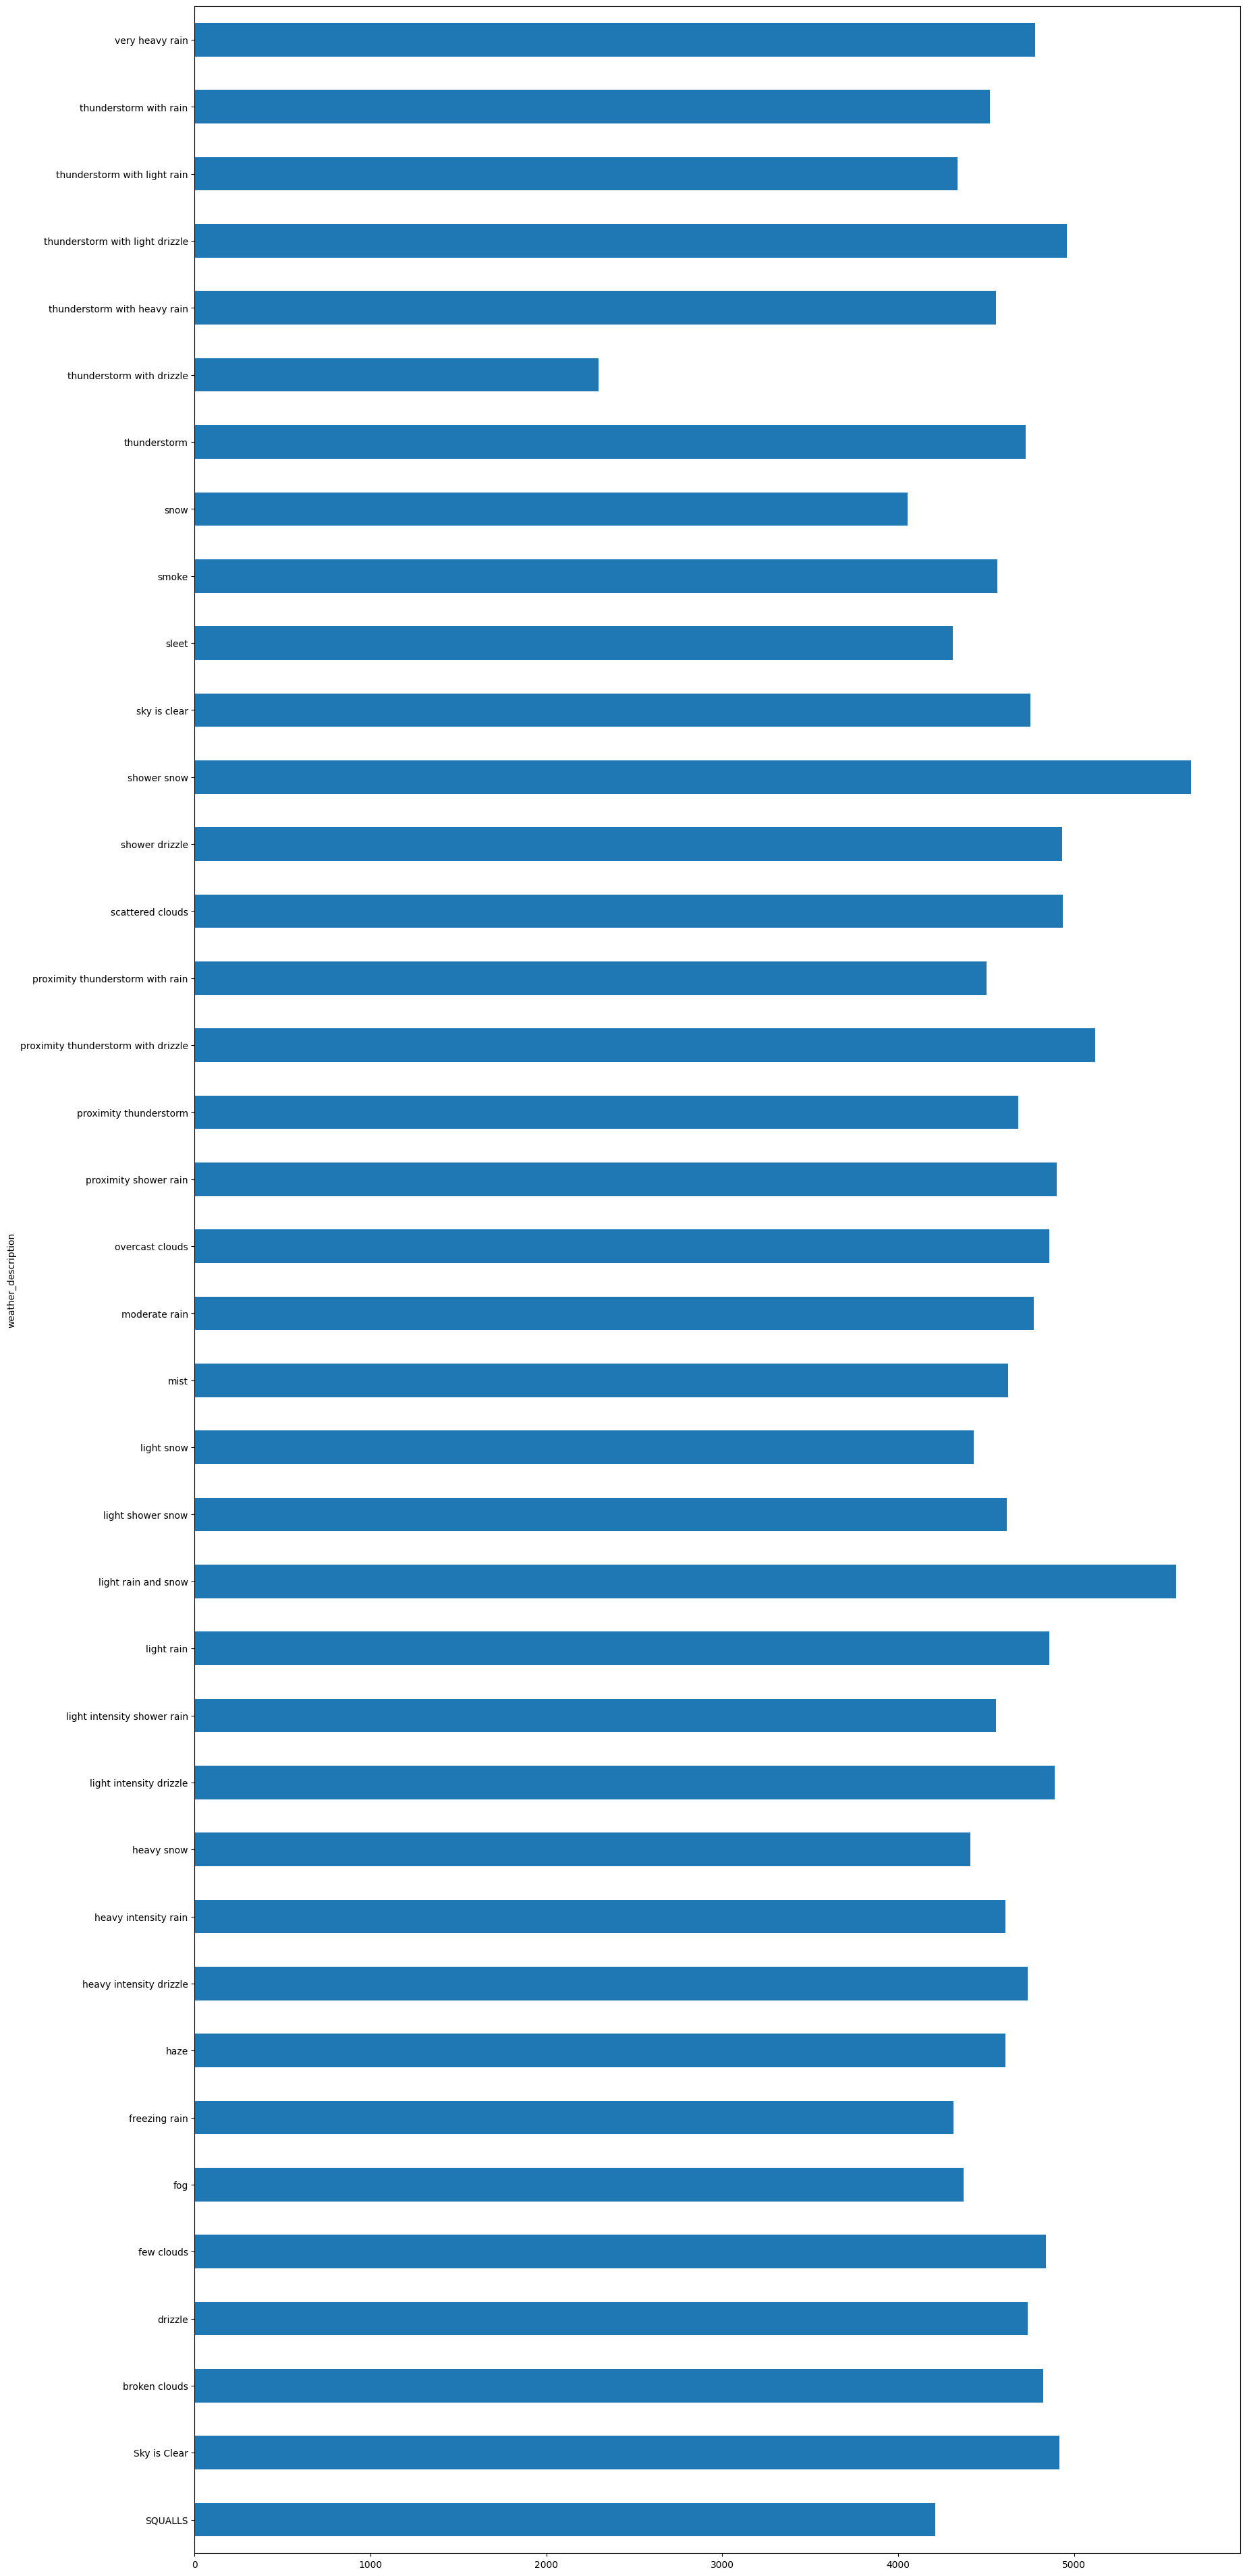

In [65]:
by_weather_description["traffic_volume"].plot.barh(figsize=(20,50))

There are several exceedind 5000, like: Shower snow, Light rain and snow, Proximity thunderstorm with drizzle.
It seems that people prefer to use the car when there is bad weather

## In Conclusion
We discovered that the highest amount of traffic is during the period March-April, during the business days and the first and last hours of those days. Furthermore, the weather has an impact on it, in particular when there is a "bad weather".